In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = {'국민':26, '대통령':33, '대한민국':9, '좋은나라':50}

wordcloud = WordCloud(font_path='c:/windows/fonts/malgunbd.ttf', stopwords=STOPWORDS, background_color='white',
                       width=1000, height=800).generate_from_frequencies(data)

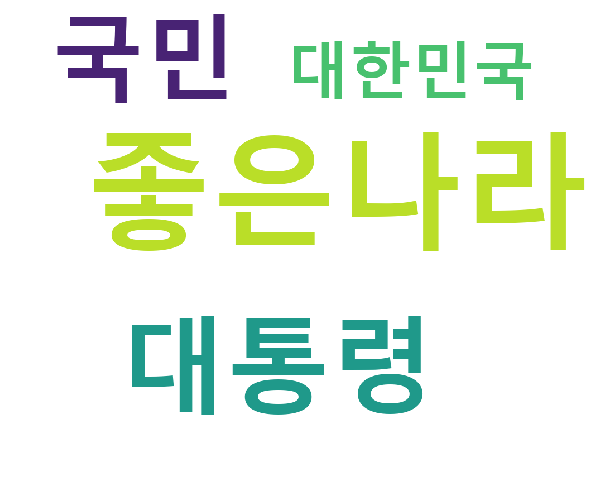

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [6]:
from nltk.tokenize import word_tokenize
import nltk
from konlpy.tag import Twitter
pos_tagger = Twitter()

C:\Users\stu\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [7]:
train = [('홍길동은 좋아', '긍정'),
         ('강아지는 무지 좋아', '긍정'),
         ('수업이 재미없어', '부정'),
         ('홍길동은 이쁜 강아지야', '긍정'),
         ('난 수업 마치고 홍길동이랑 놀거야', '긍정'),
         ('오늘 하루는 너무 짜증스러운 날이야', '부정'),
         ('하루가 너무 짜증스러운 날이야', '부정'),
         ('날이 맑아서 좋아', '긍정'),
         ('오늘 지하철에 사람이 너무 많아서 짜증이 난다', '부정'),
         ('지하철에서 질서가 너무 없어 짜증이 난다', '부정'),
         ('비가 오니 짜증난다', '부정'),
         ('친구가 짜증낸다', '부정'),
         ('하늘이 맑아서 행복하다', '긍정'),
         ('밝게 인사해주니 행복하다', '긍정')]

In [22]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
allword = set(word for sentence in train for word in word_tokenize(sentence[0]))

In [24]:
allword

{'강아지는',
 '강아지야',
 '난',
 '난다',
 '날이',
 '날이야',
 '너무',
 '놀거야',
 '마치고',
 '많아서',
 '맑아서',
 '무지',
 '밝게',
 '비가',
 '사람이',
 '수업',
 '수업이',
 '없어',
 '오늘',
 '오니',
 '이쁜',
 '인사해주니',
 '재미없어',
 '좋아',
 '지하철에',
 '지하철에서',
 '질서가',
 '짜증난다',
 '짜증낸다',
 '짜증스러운',
 '짜증이',
 '친구가',
 '하늘이',
 '하루가',
 '하루는',
 '행복하다',
 '홍길동은',
 '홍길동이랑'}

In [25]:
t = [({word: (word in word_tokenize(x[0])) for word in allword}, x[1]) for x in train]

In [27]:
classifier = nltk.NaiveBayesClassifier.train(t)

In [29]:
classifier.show_most_informative_features()

Most Informative Features
                      너무 = False              긍정 : 부정     =      2.1 : 1.0
                      좋아 = False              부정 : 긍정     =      1.7 : 1.0
                    홍길동은 = False              부정 : 긍정     =      1.4 : 1.0
                    행복하다 = False              부정 : 긍정     =      1.4 : 1.0
                   짜증스러운 = False              긍정 : 부정     =      1.4 : 1.0
                      난다 = False              긍정 : 부정     =      1.4 : 1.0
                     맑아서 = False              부정 : 긍정     =      1.4 : 1.0
                      오늘 = False              긍정 : 부정     =      1.4 : 1.0
                     날이야 = False              긍정 : 부정     =      1.4 : 1.0
                     짜증이 = False              긍정 : 부정     =      1.4 : 1.0


In [30]:
test = '난 수업을 마치면 홍길동이랑 놀거야'
test_f = {word:(word in word_tokenize(test)) for word in allword}
classifier.classify(test_f)

'긍정'

In [31]:
test = '오늘 왠일이니 짜증난다'
test_f = {word:(word in word_tokenize(test)) for word in allword}
classifier.classify(test_f)

'부정'

In [32]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [34]:
train_doc = [(tokenize(row[0]), row[1]) for row in train]

In [35]:
tokens = [t for d in train_doc for t in d[0]]

In [36]:
tokens

['홍길동/Noun',
 '은/Josa',
 '좋다/Adjective',
 '강아지/Noun',
 '는/Josa',
 '무지/Noun',
 '좋다/Adjective',
 '수업/Noun',
 '이/Josa',
 '재미없다/Adjective',
 '홍길동/Noun',
 '은/Josa',
 '이쁘다/Adjective',
 '강아지/Noun',
 '야/Josa',
 '난/Noun',
 '수업/Noun',
 '마치/Noun',
 '고/Josa',
 '홍길동/Noun',
 '이랑/Josa',
 '놀다/Verb',
 '오늘/Noun',
 '하루/Noun',
 '는/Josa',
 '너무/Adverb',
 '짜증스럽다/Adjective',
 '날/Noun',
 '이야/Josa',
 '하루/Noun',
 '가/Josa',
 '너무/Adverb',
 '짜증스럽다/Adjective',
 '날/Noun',
 '이야/Josa',
 '날/Noun',
 '이/Josa',
 '맑다/Adjective',
 '좋다/Adjective',
 '오늘/Noun',
 '지하철/Noun',
 '에/Josa',
 '사람/Noun',
 '이/Josa',
 '너무/Adverb',
 '많다/Adjective',
 '짜증/Noun',
 '이/Josa',
 '나다/Verb',
 '지하철/Noun',
 '에서/Josa',
 '질서/Noun',
 '가/Josa',
 '너무/Adverb',
 '없다/Adjective',
 '짜증/Noun',
 '이/Josa',
 '나다/Verb',
 '비/Noun',
 '가/Josa',
 '오니/Noun',
 '짜증나다/Adjective',
 '친구/Noun',
 '가/Josa',
 '짜증/Noun',
 '내다/Verb',
 '하늘/Noun',
 '이/Josa',
 '맑다/Adjective',
 '행복하다/Adjective',
 '밝다/Verb',
 '인사/Noun',
 '해주다/Verb',
 '행복하다/Adjective']

In [44]:
def term_exists(doc):
    return {word:(word in set(doc)) for word in tokens}

In [45]:
train_x = [(term_exists(d), c) for d,c in train_doc]
train_x

[({'홍길동/Noun': True,
   '은/Josa': True,
   '좋다/Adjective': True,
   '강아지/Noun': False,
   '는/Josa': False,
   '무지/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '재미없다/Adjective': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '난/Noun': False,
   '마치/Noun': False,
   '고/Josa': False,
   '이랑/Josa': False,
   '놀다/Verb': False,
   '오늘/Noun': False,
   '하루/Noun': False,
   '너무/Adverb': False,
   '짜증스럽다/Adjective': False,
   '날/Noun': False,
   '이야/Josa': False,
   '가/Josa': False,
   '맑다/Adjective': False,
   '지하철/Noun': False,
   '에/Josa': False,
   '사람/Noun': False,
   '많다/Adjective': False,
   '짜증/Noun': False,
   '나다/Verb': False,
   '에서/Josa': False,
   '질서/Noun': False,
   '없다/Adjective': False,
   '비/Noun': False,
   '오니/Noun': False,
   '짜증나다/Adjective': False,
   '친구/Noun': False,
   '내다/Verb': False,
   '하늘/Noun': False,
   '행복하다/Adjective': False,
   '밝다/Verb': False,
   '인사/Noun': False,
   '해주다/Verb': False},
  '긍정'),
 ({'홍길동/Noun': False,
   '은/Josa': Fals

In [46]:
classifier = nltk.NaiveBayesClassifier.train(train_x)
classifier.show_most_informative_features()

Most Informative Features
                  가/Josa = False              긍정 : 부정     =      2.1 : 1.0
               너무/Adverb = False              긍정 : 부정     =      2.1 : 1.0
                홍길동/Noun = False              부정 : 긍정     =      1.7 : 1.0
                 짜증/Noun = False              긍정 : 부정     =      1.7 : 1.0
            좋다/Adjective = False              부정 : 긍정     =      1.7 : 1.0
                  날/Noun = True               부정 : 긍정     =      1.7 : 1.0
                  이/Josa = True               부정 : 긍정     =      1.4 : 1.0
                 나다/Verb = False              긍정 : 부정     =      1.4 : 1.0
                 오늘/Noun = False              긍정 : 부정     =      1.4 : 1.0
         짜증스럽다/Adjective = False              긍정 : 부정     =      1.4 : 1.0


In [47]:
test = [('홍길동이랑 놀거야')]
test_doc = tokenize(test[0])
test_f = {word:(word in tokens) for word in test_doc}
classifier.classify(test_f)

'긍정'

In [48]:
test = [('오늘 왠일이니 짜증난다')]
test_doc = tokenize(test[0])
test_f = {word:(word in tokens) for word in test_doc}
classifier.classify(test_f)

'부정'

# 의사결정트리
-  의사결정규칙(Decision rule)을 나무구조(Tree)로 도표화하여 분류(classification)와 예측(prediction)을 수행하는 방법

-  ## 활용분야
    -  은행분야: 도산업체 분류(예측)/과거의 데이터로부터 도산기업과 도산하지않을 기업을 찾아내는 방법
    -  카드발급대상: 신용불량자 분류(예측)
    -  통신: 이탈고객(해지자, 번호이동) 분류, 새로운 서비스 대상 고객 선정
    -  쇼핑: DM 대상 고객 선정

-  ## 결정트리 장점
    -  지도학습(분류, 예측)의 데이터마이닝 기법
    -  적용결과에 의해 if - then으로 표현하는 규칙이 생성
    -  규칙의 이행이 쉽고 SQL로도 할 수 있다
    -  많은 분야에서는 결정을 내리게 되는데 대한 이유를 설명하는 능력이 중요하다(해석력)

-  ## 분류나무(classification tree)
    -  목표변수: 범주형(도산 vs 정상, 좋음 vs 나쁨)
    -  분류 알고리즘
        -  CART: 지니지수(Gini index)
        -  C5.0: 엔트로피지수(Entropy index)
        -  CHAID: 카이제곱통계량(Chi-Square statistic)

# 교차분석
-  교차분석은 범주형(명목척도, 서열척도)으로 구성된 자료들간의 연관관계를 확인하기 위해 교차표를 만들어 관계를 확인하는 방법
-  변수들의 빈도를 확인하고 그 빈도를 이용하여 상호 연관성을 판단한다(빈도를 이용하는 이유는 명목척도이기 때문에)
-  이때 검정통계량으로 카이제곱(χ²) 통계량을 이용하기 때문에

-  ## 교차표
    -  2개의 조사요인에 대한 자료값을 각각 행과 열로 배열하여 교차되는 항목에 대한 빈도를 나타낸 표를 교차표라 한다
    -  교차표의 행과 열에 범주형(명목척도)변수를 구분하여 넣으면 서로 연관성이 있는 빈도를 확인할 수 있다
    - 예) 지역1과 지역2로 구분하여 최신 스마트폰의 구매 의사에 대한 각각의 행과 열에 해당하는 빈도를 표시한 교차표
        ```
                구매의사
         지역     있음  없음  행의 합
        -----------------------------
           1      154   52    206
        기대빈도  102   104
            2     7     112   119
        기대빈도  59    60
        -------------------------
        열의 합   161   164   325
        ```

    -  ### 관측빈도(observed frequency)
        -  교차표를 작성할 때에는 직접 수집한 데이터를 기준으로 빈도를 입력해야 하는데 이처럼 실제로 수집된 데이터의 빈도를 관측빈도라고 한다.

    -  ### 기대빈도(expected frequency)
        -   기대빈도는 전체빈도 n에 대하여 행과 열의 합을 기준으로 보았을 때 각 교차되는 셀에 몇번의 빈도가 확인될 수 있을지를 예상하는 기대값
        -  `행의합*열의합 / 관측수`

-  ## 카이제곱 통계량(카이제곱검정)
    -  관측빈도와 기대빈도사이의 유의미한 차이가 있는지 확인하는 통계량
    -  χ² = Σ [(관측빈도-기대빈도)² / 기대빈도]

    -  ### 카이제곱분포에서의 자유도
        -  카이제곱 검정을 실시하는 경우에는 p값을 이용할 수 있으며, 카이제곱분포의 유의수준과 자유도에 따라 결과를 판단한다.
        -  df(degree of freedom) `자유도 = k - 1(k는 범주형의 변수의 수)`
        -  교차표에서 구성된 범주에 대한 자유도를 계산하는 방법은 교차표의 `(행의수-1)*(열의수-1)`

# 독립성 검정(independence test)
1. 가설수립: 각 범주가 서로 독립적인지 아닌지에 대한 검정이므로 귀무가설은 독립인 것이다.
    -  H0 (Null Hypothesis)
        -  귀무가설, 영가설
        -  일반적으로 믿어온 사실을 가설로 설정한다
        -  귀무가설은 당연한 사실이나 연구할 의미가 없는 가설로 설정한다
        
    -  H1 (Anti Hypothesis)
        -  대립가설, 연구가설
        -  공공연하게 사실로 받아들여진 현상에 대립되는 가설로 연구를 통한 대립가설의 조사는 의미가 있다
        
        
    -  ex) H0: 지역과 구매의사는 독립이다(아무 연관이 없다)
           H1: 지역과 구매의사는 독립이 아니다(연관이 있다)

2. 교차표, 교차빈도
3. 기대빈도
4. 카이제곱통계량
5. 자유도
6. 임계치: 카이제곱 분포표에서 α = 0.01 (99%의 유의수준), 자유도(df=1) 임계치는 6.63이므로 143.3 보다 작다
7. 결론: 귀무가설을 기각하고 대립가설을 채택한다.


In [53]:
import pandas as pd
data = pd.read_csv('tree.csv', encoding='utf-8')
data

,일,날씨,기온,습도,바람,테니스유무
0,1,맑음,높음,높음,약함,아니요
1,2,맑음,높음,높음,강함,아니요
2,3,흐림,높음,높음,약함,예
3,4,비,보통,높음,약함,예
4,5,비,낮음,보통,약함,예
5,6,비,낮음,보통,강함,아니요
6,7,흐림,낮음,보통,강함,예
7,8,맑음,보통,높음,약함,아니요
8,9,맑음,낮음,보통,약함,예
9,10,비,보통,보통,약함,예


In [60]:
data.loc[:,['습도','테니스유무']].sort_values('습도')

,습도,테니스유무
0,높음,아니요
1,높음,아니요
2,높음,예
3,높음,예
7,높음,아니요
11,높음,예
13,높음,아니요
4,보통,예
5,보통,아니요
6,보통,예


In [74]:
test = pd.crosstab(data.습도, data.테니스유무, margins=True)

In [72]:
data

,일,날씨,기온,습도,바람,테니스유무
0,1,맑음,높음,높음,약함,아니요
1,2,맑음,높음,높음,강함,아니요
2,3,흐림,높음,높음,약함,예
3,4,비,보통,높음,약함,예
4,5,비,낮음,보통,약함,예
5,6,비,낮음,보통,강함,아니요
6,7,흐림,낮음,보통,강함,예
7,8,맑음,보통,높음,약함,아니요
8,9,맑음,낮음,보통,약함,예
9,10,비,보통,보통,약함,예


In [71]:
data.shape

(14, 6)

In [108]:
def get_pv(data):
    import pandas as pd
    
    x,y = data.shape
    result = []
    for i in range(x-1):
        for j in range(y-1):
            result.append((data.iloc[i,y-1] * data.iloc[x-1,j])/data.iloc[x-1,y-1])
    col_num = int(len(result)/(y-1))
    df = []
    start = 0
    for i in range(col_num):
        end = start+col_num
        df.append(result[start:end])
        start = end
    return pd.DataFrame(df)
#     result = pd.DataFrame(result, index=range(x), columns=range(y))
    

In [104]:
test

테니스유무,아니요,예,All
습도,,,
높음,4,3,7
보통,1,6,7
All,5,9,14


In [110]:
get_pv(test)

,0,1
0,2.5,4.5
1,2.5,4.5


In [ ]:
Σ [(관측빈도-기대빈도)² / 기대빈도]

In [111]:
def get_qi(data):
    predict = get_pv(data)
    x,y = data.shape
    result = []
    for i in range(x-1):
        for j in range(y-1):
            result.append(pow((data.iloc[i,j]-predict.iloc[i,j]),2)/predict.iloc[i,j])
    return sum(result)

In [112]:
get_qi(test)

2.8